This notebook removes unwanted columns, and non-active associations to reduce data set size.

It also adds a new column of simplified assication objectives.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./../../data_processed/clean_data.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,date_creat,date_disso,nature,groupement,titre,titre_court,objet,objet_social1,objet_social2,...,adrg_libvoie,adrg_distrib,adrg_codepostal,adrg_achemine,adrg_pays,dir_civilite,position,objet_social1_desc,objet_social2_desc,association_active
0,W632007046,2014-06-17,2015-01-20,D,S,BLACK OWL,BLACK OWL,"promouvoir la scène indépendante musicale ""psy...",6030,0,...,35 RUE PASCAL,NaN,63000,CLERMONT-FERRAND,FRANCE,PP,D,"chant choral, musique",NaN,0
1,W012000002,1983-10-10,0001-01-01,D,S,ARIADNE,ARIADNE,Favoriser le développement d'une compagnie thé...,6070,6070,...,39 rue Courteline,NaN,69100,villeurbanne,FRANCE,PM,A,"théâtre, marionnettes, cirque, spectacles de v...","théâtre, marionnettes, cirque, spectacles de v...",1
2,W012000005,2003-09-01,0001-01-01,D,S,UNITE FRANCAISE D'INTERVENTION EN CATASTROPHE ...,UNITE FRANCAISE D'INTERVENTION EN ...,Intervenir lors de catastrophes naturelles sur...,20000,20000,...,18 rue Ampère,NaN,69270,FONTAINE SUR SAONE,FRANCE,PM,A,"associations caritatives, humanitaires, aide a...","associations caritatives, humanitaires, aide a...",1
3,W012000006,1999-02-11,2008-02-27,D,S,TRIADE BASS,TRIADE BASSE,la promotion et la diffusion de la création ar...,6000,6000,...,44 QUAI CLEMENCEAU,NaN,69300,CALUIRE ET CUIRE,FRANCE,PM,D,"culture, pratiques d\’activités artistiques, c...","culture, pratiques d\’activités artistiques, c...",0
4,W033002617,2008-05-19,0001-01-01,D,S,ASSOCIATION MAYOTTE FOOTBALL CLUB DE BELLERIVE...,MAYOTTE FOOTBALL CLUB BSA,pratiquer et développer le football; organisat...,11075,0,...,8 RUE EMMANUEL CHABRIER,NaN,03700,BELLERIVE-SUR-ALLIER,FRANCE,PM,A,"Football (football, futsal)",NaN,1


In [4]:
dff = df[df.association_active == 1]

In [5]:
dff.shape

(1531245, 32)

In [6]:
dff.adrg_codepostal.isnull().sum()

1854

In [7]:
dff.adrs_codepostal.isnull().sum()

71

In [8]:
2/17

0.11764705882352941

comparison between two objet types

In [9]:
dff.tail(2)

,id,date_creat,date_disso,nature,groupement,titre,titre_court,objet,objet_social1,objet_social2,...,adrg_libvoie,adrg_distrib,adrg_codepostal,adrg_achemine,adrg_pays,dir_civilite,position,objet_social1_desc,objet_social2_desc,association_active
1733096,W343026793,1934-12-18,0001-01-01,D,S,ASSOCIATION D EDUCATION POPULAIRE SAINT VINCENT,ASSOCIATION D EDUCATION POPULAIRE S...,"gérer, entretenir et restaurer, au plus juste ...",20000,0,...,4 CHEMIN DES FRèRES,NaN,34560,POUSSAN,FRANCE,PF,A,"associations caritatives, humanitaires, aide a...",NaN,1
1733097,W951005828,2018-10-29,0001-01-01,D,S,DME DAANDE MAAYO EMERGENT DIASPORA,DME DAANDE MAAYO EMERGENT DIASPORA,rassembler tous les ressortissants du Daande M...,14045,0,...,3 ALLÉE BOILEAU,NaN,95110,SANNOIS,FRANCE,PM,A,amicale de personnes originaires d'une même ré...,NaN,1


#### Test dropping as much as possible

In [10]:
dff.shape

(1531245, 32)

In [11]:
for i in dff.columns:
    print(i)

id
date_creat
date_disso
nature
groupement
titre
titre_court
objet
objet_social1
objet_social2
adrs_complement
adrs_numvoie
adrs_repetition
adrs_typevoie
adrs_libvoie
adrs_distrib
adrs_codeinsee
adrs_codepostal
adrs_libcommune
adrg_declarant
adrg_complemid
adrg_complemgeo
adrg_libvoie
adrg_distrib
adrg_codepostal
adrg_achemine
adrg_pays
dir_civilite
position
objet_social1_desc
objet_social2_desc
association_active


In [12]:
drop_cols = [
    'date_disso',
    'adrs_complement',
    'adrs_numvoie',
    'adrs_repetition',
    'adrs_typevoie',
    'adrs_libvoie',
    'adrs_distrib',
    'adrs_codeinsee',
    'adrs_codepostal',
    'adrs_libcommune',
    'dir_civilite',
    'objet_social2_desc',
    'objet_social2',
    'position',
    'association_active',
    
]

dff.drop(columns=drop_cols, inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
dff.shape

(1531245, 17)

#### adding in new simpler descriptive columns

éducation
culture et loisirs
action sociale
sports
santé 
environnement
services publics
autre
réseaux
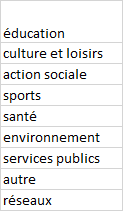

In [14]:
obj = pd.read_excel('./../../data_processed/objet_social_nomenclature_bradv1.xlsx')

In [15]:
obj

,Code Objet Social,Objet Social,object_social_group
0,1000,activités politiques,réseaux
1,1005,associations à caractère politique général,réseaux
2,1010,soutien et financement de partis et de campagn...,réseaux
3,1015,action politique locale,réseaux
4,1020,action politique globale,réseaux
...,...,...,...
292,38000,"armée (dont préparation militaire, médailles)",autre
293,38105,anciens combattants,autre
294,38110,"associations de militaires, amicales, associat...",autre
295,40000,"activités religieuses, spirituelles ou philoso...",autre


In [16]:
obj.object_social_group.unique()

array(['réseaux', 'action sociale', 'autre', 'culture et loisirs',
       'sports', 'éducation', 'santé ', 'environnement',
       'services publics'], dtype=object)

In [17]:
dff.columns

Index(['id', 'date_creat', 'nature', 'groupement', 'titre', 'titre_court',
       'objet', 'objet_social1', 'adrg_declarant', 'adrg_complemid',
       'adrg_complemgeo', 'adrg_libvoie', 'adrg_distrib', 'adrg_codepostal',
       'adrg_achemine', 'adrg_pays', 'objet_social1_desc'],
      dtype='object')

In [18]:
dff2 = dff.merge(obj[['Code Objet Social','object_social_group']], how='left', left_on = 'objet_social1', right_on='Code Objet Social', )

In [19]:
dff2 = dff2.drop('Code Objet Social',axis=1)

In [20]:
dff.shape

(1531245, 17)

In [21]:
dff2.shape

(1531245, 18)

In [22]:
dff2.head()

,id,date_creat,nature,groupement,titre,titre_court,objet,objet_social1,adrg_declarant,adrg_complemid,adrg_complemgeo,adrg_libvoie,adrg_distrib,adrg_codepostal,adrg_achemine,adrg_pays,objet_social1_desc,object_social_group
0,W012000002,1983-10-10,D,S,ARIADNE,ARIADNE,Favoriser le développement d'une compagnie thé...,6070,NaN,NaN,NaN,39 rue Courteline,NaN,69100,villeurbanne,FRANCE,"théâtre, marionnettes, cirque, spectacles de v...",culture et loisirs
1,W012000005,2003-09-01,D,S,UNITE FRANCAISE D'INTERVENTION EN CATASTROPHE ...,UNITE FRANCAISE D'INTERVENTION EN ...,Intervenir lors de catastrophes naturelles sur...,20000,NaN,NaN,NaN,18 rue Ampère,NaN,69270,FONTAINE SUR SAONE,FRANCE,"associations caritatives, humanitaires, aide a...",action sociale
2,W033002617,2008-05-19,D,S,ASSOCIATION MAYOTTE FOOTBALL CLUB DE BELLERIVE...,MAYOTTE FOOTBALL CLUB BSA,pratiquer et développer le football; organisat...,11075,NaN,NaN,NaN,8 RUE EMMANUEL CHABRIER,NaN,03700,BELLERIVE-SUR-ALLIER,FRANCE,"Football (football, futsal)",sports
3,W423003687,2008-07-02,D,S,SOUL ALMIGHTY,SOUL ALMIGHTY,promouvoir la musique reggae tout en participa...,6030,NaN,NaN,NaN,36 rue de la Roche du Geai,NaN,42000,Saint-Étienne,FRANCE,"chant choral, musique",culture et loisirs
4,W441001349,2012-03-29,D,S,TUMBA MUSIC,TUMBA MUSIC,développer des actions culturelles de soutien ...,6030,NaN,NaN,NaN,6 rue du Boispéan,NaN,44110,Châteaubriant,FRANCE,"chant choral, musique",culture et loisirs


In [24]:
dff2.object_social_group.value_counts()

culture et loisirs    436992
sports                326663
action sociale        287248
réseaux               155870
éducation             114374
autre                  98782
santé                  51974
environnement          48775
services publics        9102
Name: object_social_group, dtype: int64

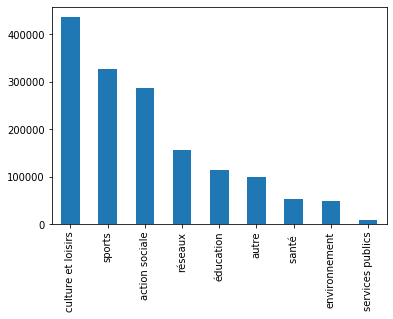

In [27]:
%matplotlib inline
dff2.object_social_group.value_counts().plot(kind='bar')

In [32]:
dff2.head(2)

,id,date_creat,nature,groupement,titre,titre_court,objet,objet_social1,adrg_declarant,adrg_complemid,adrg_complemgeo,adrg_libvoie,adrg_distrib,adrg_codepostal,adrg_achemine,adrg_pays,objet_social1_desc,object_social_group
0,W012000002,1983-10-10,D,S,ARIADNE,ARIADNE,Favoriser le développement d'une compagnie thé...,6070,NaN,NaN,NaN,39 rue Courteline,NaN,69100,villeurbanne,FRANCE,"théâtre, marionnettes, cirque, spectacles de v...",culture et loisirs
1,W012000005,2003-09-01,D,S,UNITE FRANCAISE D'INTERVENTION EN CATASTROPHE ...,UNITE FRANCAISE D'INTERVENTION EN ...,Intervenir lors de catastrophes naturelles sur...,20000,NaN,NaN,NaN,18 rue Ampère,NaN,69270,FONTAINE SUR SAONE,FRANCE,"associations caritatives, humanitaires, aide a...",action sociale


# saving to csv

In [28]:
dff2.to_csv('./../../data_processed/clean_data_small_v2.csv', index=False)

#### produce local associations only

In [30]:
pd.read_excel('./../../data_processed/objet_social_nomenclature_bradv1.xlsx')

,objet_social1,objet_social1_desc,object_social_group
0,1000,activités politiques,réseaux
1,1005,associations à caractère politique général,réseaux
2,1010,soutien et financement de partis et de campagn...,réseaux
3,1015,action politique locale,réseaux
4,1020,action politique globale,réseaux
...,...,...,...
292,38000,"armée (dont préparation militaire, médailles)",autre
293,38105,anciens combattants,autre
294,38110,"associations de militaires, amicales, associat...",autre
295,40000,"activités religieuses, spirituelles ou philoso...",autre


In [29]:
pd.read_csv('./../../data_processed/clean_data_small_v2.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,date_creat,nature,groupement,titre,titre_court,objet,objet_social1,adrg_declarant,adrg_complemid,adrg_complemgeo,adrg_libvoie,adrg_distrib,adrg_codepostal,adrg_achemine,adrg_pays,objet_social1_desc,object_social_group
0,W012000002,1983-10-10,D,S,ARIADNE,ARIADNE,Favoriser le développement d'une compagnie thé...,6070,NaN,NaN,NaN,39 rue Courteline,NaN,69100,villeurbanne,FRANCE,"théâtre, marionnettes, cirque, spectacles de v...",culture et loisirs
1,W012000005,2003-09-01,D,S,UNITE FRANCAISE D'INTERVENTION EN CATASTROPHE ...,UNITE FRANCAISE D'INTERVENTION EN ...,Intervenir lors de catastrophes naturelles sur...,20000,NaN,NaN,NaN,18 rue Ampère,NaN,69270,FONTAINE SUR SAONE,FRANCE,"associations caritatives, humanitaires, aide a...",action sociale
2,W033002617,2008-05-19,D,S,ASSOCIATION MAYOTTE FOOTBALL CLUB DE BELLERIVE...,MAYOTTE FOOTBALL CLUB BSA,pratiquer et développer le football; organisat...,11075,NaN,NaN,NaN,8 RUE EMMANUEL CHABRIER,NaN,03700,BELLERIVE-SUR-ALLIER,FRANCE,"Football (football, futsal)",sports
3,W423003687,2008-07-02,D,S,SOUL ALMIGHTY,SOUL ALMIGHTY,promouvoir la musique reggae tout en participa...,6030,NaN,NaN,NaN,36 rue de la Roche du Geai,NaN,42000,Saint-Étienne,FRANCE,"chant choral, musique",culture et loisirs
4,W441001349,2012-03-29,D,S,TUMBA MUSIC,TUMBA MUSIC,développer des actions culturelles de soutien ...,6030,NaN,NaN,NaN,6 rue du Boispéan,NaN,44110,Châteaubriant,FRANCE,"chant choral, musique",culture et loisirs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531240,W951006063,2003-05-12,D,S,SAVOIR ET CONNAISSANCE,SAVOIR ET CONNAISSANCE,combiner la culture et l'ouverture sur le mond...,15000,NaN,NaN,NaN,6 RUE PIERRE LOTI,NaN,95220,HERBLAY,FRANCE,éducation formation,éducation
1531241,W751072587,1982-05-17,D,S,ASSOCIATION SPORTIVE CAMBODGIENNE AS CAMBODGIENNE,ASSOCIATION SPORTIVE CAMBODGIENNE A...,"développer la pratique du sport loisir, princi...",11135,NaN,NaN,NaN,32 RUE HENRI CHEVREAU,NaN,75020,PARIS 20,FRANCE,"Sports aériens (avion, planeur, ULM, parachuti...",sports
1531242,W022006227,1996-01-21,D,S,"MOUVEMENT FRANCAIS POUR LE PLANNING FAMILIAL, ...",PLANNING FAMILIAL 02,lutter pour le droit à l'information et a l'éd...,19000,NaN,PRéSIDENTE DE L'ASSOCIATION,NaN,74 BOULEVARD GAMBETTA,BP 80028,02300,CHAUNY,FRANCE,interventions sociales,action sociale
1531243,W343026793,1934-12-18,D,S,ASSOCIATION D EDUCATION POPULAIRE SAINT VINCENT,ASSOCIATION D EDUCATION POPULAIRE S...,"gérer, entretenir et restaurer, au plus juste ...",20000,NaN,NaN,NaN,4 CHEMIN DES FRèRES,NaN,34560,POUSSAN,FRANCE,"associations caritatives, humanitaires, aide a...",action sociale


In [17]:
pd.read_csv('./../../data_processed/clean_data_small_v2.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,date_creat,nature,groupement,titre,titre_court,objet,objet_social1,adrg_declarant,adrg_complemid,adrg_complemgeo,adrg_libvoie,adrg_distrib,adrg_codepostal,adrg_achemine,adrg_pays,objet_social1_desc
0,W012000002,1983-10-10,D,S,ARIADNE,ARIADNE,Favoriser le développement d'une compagnie thé...,6070,NaN,NaN,NaN,39 rue Courteline,NaN,69100,villeurbanne,FRANCE,"théâtre, marionnettes, cirque, spectacles de v..."
1,W012000005,2003-09-01,D,S,UNITE FRANCAISE D'INTERVENTION EN CATASTROPHE ...,UNITE FRANCAISE D'INTERVENTION EN ...,Intervenir lors de catastrophes naturelles sur...,20000,NaN,NaN,NaN,18 rue Ampère,NaN,69270,FONTAINE SUR SAONE,FRANCE,"associations caritatives, humanitaires, aide a..."
2,W033002617,2008-05-19,D,S,ASSOCIATION MAYOTTE FOOTBALL CLUB DE BELLERIVE...,MAYOTTE FOOTBALL CLUB BSA,pratiquer et développer le football; organisat...,11075,NaN,NaN,NaN,8 RUE EMMANUEL CHABRIER,NaN,03700,BELLERIVE-SUR-ALLIER,FRANCE,"Football (football, futsal)"
3,W423003687,2008-07-02,D,S,SOUL ALMIGHTY,SOUL ALMIGHTY,promouvoir la musique reggae tout en participa...,6030,NaN,NaN,NaN,36 rue de la Roche du Geai,NaN,42000,Saint-Étienne,FRANCE,"chant choral, musique"
4,W441001349,2012-03-29,D,S,TUMBA MUSIC,TUMBA MUSIC,développer des actions culturelles de soutien ...,6030,NaN,NaN,NaN,6 rue du Boispéan,NaN,44110,Châteaubriant,FRANCE,"chant choral, musique"
5,W9P1000550,2016-04-15,D,S,MARUNOA,MARUNOA,promouvoir l'epanouissement et le bien-être ph...,7085,NaN,"pk 5,050 c/mont Maharepa",NaN,NaN,NaN,98728,Moorea-Maiao,FRANCE,"relaxation, sophrologie"
6,W881003828,1977-06-07,D,S,SOCIETE D'HISTOIRE DE REMIREMONT ET DE SA REGION,SOCIETE D'HISTOIRE DE REMIR...,étudier et faire connaître l'histoire et le pa...,10015,NaN,NaN,NaN,31 RUE DES PRêTRES,NaN,88200,REMIREMONT,FRANCE,"associations, sociétés savantes pour des étude..."
7,W332006701,1983-01-25,D,S,ART ET RECHERCHES,ART ET RECHERCHES,investigation systématiquement des procédures ...,7000,NaN,NaN,NaN,LA CROIX DES RAMEAUX,NaN,42660,TARENTAISE,FRANCE,"clubs de loisirs, relations"
8,W9N3000574,1993-06-01,D,S,ASSOCIATION TOIMIRI DES FEMMES DE NAPOEMIEN,ASSOCIATION TOIMIRI DES FEMMES DE N...,Favoriser une meilleure coordination entre les...,20015,NaN,Tribu de Napoémien,NaN,NaN,BP 67 POINDIMIE,98822,Poindimie,FRANCE,associations caritatives à buts multiples
9,W443003929,2007-08-10,D,S,PAN VACA,PAN VACA,promouvoir et diffuser la musique et la culure...,6030,NaN,La Huetterie,NaN,NaN,NaN,44320,FROSSAY,FRANCE,"chant choral, musique"
